In [2]:
import base64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image, ImageOps
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron #artificial Neuron
from sklearn.neural_network import MLPClassifier #artificial neural network
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../data/fashion-mnist.csv")
df_labels = df.pop('label')
X_train, X_test, y_train, y_test = train_test_split(df,df_labels,test_size=0.2)
X_train.shape, X_test.shape


((8000, 784), (2000, 784))

In [5]:
clf = Perceptron(tol=1e-3)
clf.fit(X_train,y_train)
print("Perceptron accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Perceptron accuracy: 0.784


Iteration 1, loss = 10.11140635
Iteration 2, loss = 3.35921877
Iteration 3, loss = 2.26571297
Iteration 4, loss = 1.68420988
Iteration 5, loss = 1.80577361
Iteration 6, loss = 1.48272743
Iteration 7, loss = 1.04727898
Iteration 8, loss = 0.85130991
Iteration 9, loss = 0.71705630
Iteration 10, loss = 0.61912215
Iteration 11, loss = 0.57009135
Iteration 12, loss = 0.39421960
Iteration 13, loss = 0.45426270
Iteration 14, loss = 0.41300878
Iteration 15, loss = 0.28788927
Iteration 16, loss = 0.26244414
Iteration 17, loss = 0.24038189
Iteration 18, loss = 0.25156469
Iteration 19, loss = 0.23202287
Iteration 20, loss = 0.20621434
Multilayer Perceptron accuracy: 0.801


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

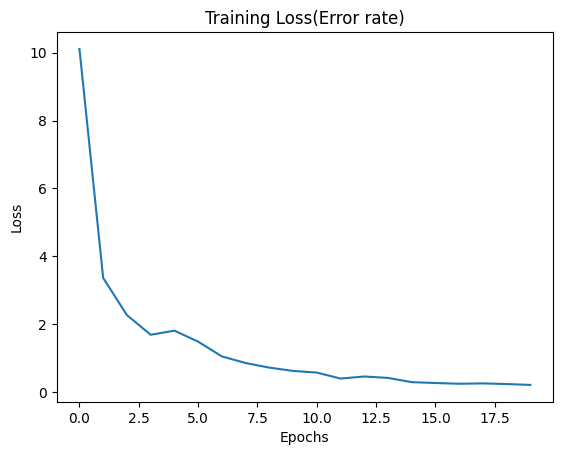

In [8]:
model = MLPClassifier(hidden_layer_sizes=(512,256),max_iter=20,verbose=True)
model.fit(X_train,y_train) #Max iter means 20 passses through the training data

#evaluate
y_pred = model.predict(X_test)
print("Multilayer Perceptron accuracy:", accuracy_score(y_test, y_pred))

plt.plot(model.loss_curve_)
plt.title('Training Loss(Error rate)')
plt.xlabel('Epochs') # Iterations through the data 
plt.ylabel('Loss')
plt.show

Predicted class: Shirt


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


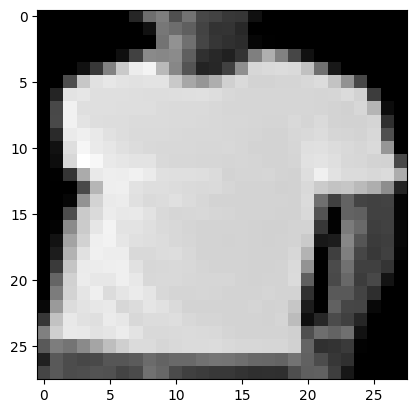

In [11]:
def predict_from_base64(b_str):
    img_data = base64.b64decode(b_str)

    #Preprocess image to match dataset
    img = Image.open(BytesIO(img_data)).convert('L') #Grayscale
    img = ImageOps.invert(img)
    img = img.resize((28,28))
    img_arr = np.array(img).reshape(-1) / 255.0 #flatten and normalize 
    return model.predict([img_arr])[0], img

classes = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress','Coat','Sandel', 'Shirt', 'Sneaker', 'Bag', 'Ankel Boot']

b64_str = input("Input the base64 string of the image (bit.ly/b64encode): ")
prediction, image = predict_from_base64(b64_str)
print("Predicted class:", classes[prediction])

plt.imshow(image,cmap='gray')
plt.show()